#### QSAR Model investigation for MSTI p2 data

Workflow adapted from using Will Koehrsen's walkthrough at  https://www.kaggle.com/code/willkoehrsen/a-complete-introduction-and-walkthrough

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import openpyxl

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
sc2 = pd.read_excel(processed_dir+'MSTI_invitrodb_01Nov2021_GP.xlsx', sheet_name = 'sc2')


In [4]:
sc2_p2 = sc2[sc2['aenm'] == 'TOX21_msti_p2_activity']

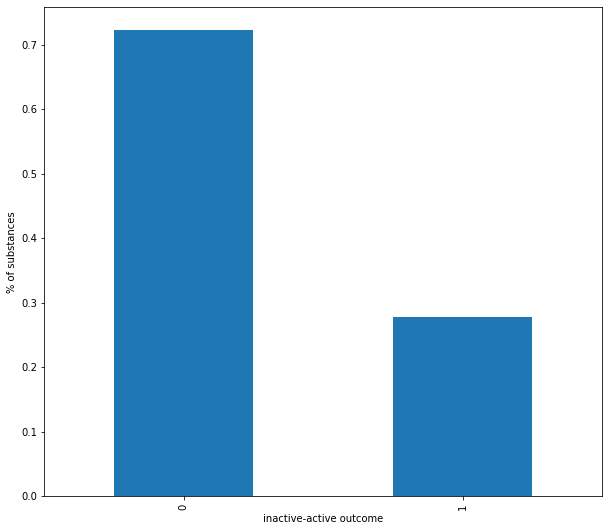

In [5]:
sc2_p2.hitc.value_counts(normalize = True).plot.bar(figsize = (10,9))
plt.ylabel('% of substances')
plt.xlabel('inactive-active outcome');

In [6]:
df = sc2_p2.groupby('dsstox_substance_id')['hitc'].max().reset_index().merge(sc2_p2[['dsstox_substance_id', 'chnm', 'casn']], on = 'dsstox_substance_id', how = 'left').drop_duplicates(subset = 'dsstox_substance_id', keep = 'first')

In [7]:
df

dsstox_substance_id  hitc  \
0          DTXSID0020020     0   
2          DTXSID0020022     1   
4          DTXSID0020024     0   
5          DTXSID0020070     0   
6          DTXSID0020072     1   
...                  ...   ...   
9664       DTXSID9057848     0   
9665       DTXSID9057890     0   
9666       DTXSID9057898     0   
9667       DTXSID9058654     0   
9668                 MLS     1   

                                                   chnm         casn  
0                        4-Acetylaminophenylacetic acid   18699-02-0  
2                                           Acifluorfen   50594-66-6  
4                                Acrolein diethylacetal    3054-95-3  
5                                     Aminocaproic acid      60-32-2  
6                         4-Biphenylamine hydrochloride    2113-61-3  
...                                                 ...          ...  
9664                                         Setoperone   86487-64-1  
9665    Anti-OP-18/Stathmin antibody produced in rabbit  NOCAS_57890  
9666  2-Amino-4-(trifluoromethyl)benzenethiol hydroc...    4274-38-8  
9667                                           BisOPP-A   24038-68-4  
9668  (E)-3-(3,5-Dibromo-2-hydroxyphenyl)-1-(5-methy...  374091-47-1  

[7872 rows x 4 columns]

In [8]:
txps = pd.read_csv(raw_dir+'msti_txps_res.txt', sep = '\t')

In [9]:
txps = txps[txps['M_CORINA_SYMPHONY_ERRORS_[STRING]'] == 'No errors']

In [10]:
txps = txps[~txps.duplicated()]

In [11]:
df = df.set_index('dsstox_substance_id')

In [12]:
txps = txps.set_index('M_NAME')

In [13]:
ids = list(set(df.index).intersection(set(txps.index)))

In [14]:
txps = txps.loc[ids, :]

In [15]:
txps = txps.iloc[:, :-2]

In [16]:
X = txps.copy()

In [17]:
X

atom:element_main_group  atom:element_metal_group_I_II  \
M_NAME                                                                  
DTXSID3027291                        0                              0   
DTXSID8040723                        0                              0   
DTXSID6026450                        0                              0   
DTXSID3047057                        0                              0   
DTXSID4020668                        0                              0   
...                                ...                            ...   
DTXSID3047504                        0                              0   
DTXSID3049419                        0                              0   
DTXSID7020267                        0                              0   
DTXSID1040245                        0                              0   
DTXSID6044985                        0                              0   

               atom:element_metal_group_III  atom:element_metal_metalloid  \
M_NAME                                                                      
DTXSID3027291                             0                             1   
DTXSID8040723                             0                             0   
DTXSID6026450                             0                             1   
DTXSID3047057                             0                             0   
DTXSID4020668                             0                             0   
...                                     ...                           ...   
DTXSID3047504                             0                             0   
DTXSID3049419                             0                             0   
DTXSID7020267                             0                             0   
DTXSID1040245                             0                             0   
DTXSID6044985                             0                             0   

               atom:element_metal_poor_metal  \
M_NAME                                         
DTXSID3027291                              0   
DTXSID8040723                              0   
DTXSID6026450                              0   
DTXSID3047057                              0   
DTXSID4020668                              0   
...                                      ...   
DTXSID3047504                              0   
DTXSID3049419                              0   
DTXSID7020267                              0   
DTXSID1040245                              0   
DTXSID6044985                              0   

               atom:element_metal_transistion_metal  atom:element_noble_gas  \
M_NAME                                                                        
DTXSID3027291                                     0                       0   
DTXSID8040723                                     0                       0   
DTXSID6026450                                     0                       0   
DTXSID3047057                                     0                       0   
DTXSID4020668                                     0                       0   
...                                             ...                     ...   
DTXSID3047504                                     0                       0   
DTXSID3049419                                     0                       0   
DTXSID7020267                                     0                       0   
DTXSID1040245                                     0                       0   
DTXSID6044985                                     0                       0   

               bond:C#N_cyano_acylcyanide  bond:C#N_cyano_cyanamide  \
M_NAME                                                                
DTXSID3027291                           0                         0   
DTXSID8040723                           0                         0   
DTXSID6026450                           0                         0   
DTXSID3047057                           0              

In [18]:
df = df.loc[ids,:]

In [19]:
df

hitc                                    chnm        casn
dsstox_substance_id                                                          
DTXSID3027291           0               Tetramethyl orthosilicate    681-84-5
DTXSID8040723           1      2-Chloro-5-nitro-N-phenylbenzamide  22978-25-2
DTXSID6026450           0                Tetraethyl orthosilicate     78-10-4
DTXSID3047057           0                       Ethyl isovalerate    108-64-5
DTXSID4020668           0                          Glycol sulfite   3741-38-6
...                   ...                                     ...         ...
DTXSID3047504           0                    Timolol maleate salt  26921-17-5
DTXSID3049419           0   Atropine sulfate anhydrous (2:1) salt     55-48-1
DTXSID7020267           0                               Chlordane     57-74-9
DTXSID1040245           0                               Sucralose  56038-13-2
DTXSID6044985           0  {2-[2-(Ethenyloxy)ethoxy]ethoxy}ethene    764-99-8

[7532 rows x 3 columns]

In [20]:
df = pd.concat([X, df], axis = 1)

Shuffle the data so it is not ordered

In [21]:
#df = df.sample(frac = 1)

In [22]:
df

atom:element_main_group  atom:element_metal_group_I_II  \
DTXSID3027291                        0                              0   
DTXSID8040723                        0                              0   
DTXSID6026450                        0                              0   
DTXSID3047057                        0                              0   
DTXSID4020668                        0                              0   
...                                ...                            ...   
DTXSID3047504                        0                              0   
DTXSID3049419                        0                              0   
DTXSID7020267                        0                              0   
DTXSID1040245                        0                              0   
DTXSID6044985                        0                              0   

               atom:element_metal_group_III  atom:element_metal_metalloid  \
DTXSID3027291                             0                             1   
DTXSID8040723                             0                             0   
DTXSID6026450                             0                             1   
DTXSID3047057                             0                             0   
DTXSID4020668                             0                             0   
...                                     ...                           ...   
DTXSID3047504                             0                             0   
DTXSID3049419                             0                             0   
DTXSID7020267                             0                             0   
DTXSID1040245                             0                             0   
DTXSID6044985                             0                             0   

               atom:element_metal_poor_metal  \
DTXSID3027291                              0   
DTXSID8040723                              0   
DTXSID6026450                              0   
DTXSID3047057                              0   
DTXSID4020668                              0   
...                                      ...   
DTXSID3047504                              0   
DTXSID3049419                              0   
DTXSID7020267                              0   
DTXSID1040245                              0   
DTXSID6044985                              0   

               atom:element_metal_transistion_metal  atom:element_noble_gas  \
DTXSID3027291                                     0                       0   
DTXSID8040723                                     0                       0   
DTXSID6026450                                     0                       0   
DTXSID3047057                                     0                       0   
DTXSID4020668                                     0                       0   
...                                             ...                     ...   
DTXSID3047504                                     0                       0   
DTXSID3049419                                     0                       0   
DTXSID7020267                                     0                       0   
DTXSID1040245                                     0                       0   
DTXSID6044985                                     0                       0   

               bond:C#N_cyano_acylcyanide  bond:C#N_cyano_cyanamide  \
DTXSID3027291                           0                         0   
DTXSID8040723                           0                         0   
DTXSID6026450                           0                         0   
DTXSID3047057                           0                         0   
DTXSID4020668                           0                         0   
...                                   ...                       ...   
DTXSID3047504                           0                         0   
DTXSID3049419                           0                         0   
DTXSID7020267                           0       

In [23]:
y = df['hitc']

In [24]:
X = df.drop(['hitc', 'chnm', 'casn'], axis =1)

In [25]:
X.shape

(7532, 729)

In [26]:
y.shape

(7532,)

In [27]:
X.describe()

atom:element_main_group  atom:element_metal_group_I_II  \
count              7532.000000                    7532.000000   
mean                  0.000133                       0.044211   
std                   0.011522                       0.205578   
min                   0.000000                       0.000000   
25%                   0.000000                       0.000000   
50%                   0.000000                       0.000000   
75%                   0.000000                       0.000000   
max                   1.000000                       1.000000   

       atom:element_metal_group_III  atom:element_metal_metalloid  \
count                   7532.000000                   7532.000000   
mean                       0.001062                      0.015666   
std                        0.032575                      0.124190   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        0.000000                      0.000000   
max                        1.000000                      1.000000   

       atom:element_metal_poor_metal  atom:element_metal_transistion_metal  \
count                    7532.000000                           7532.000000   
mean                        0.005045                              0.010356   
std                         0.070854                              0.101242   
min                         0.000000                              0.000000   
25%                         0.000000                              0.000000   
50%                         0.000000                              0.000000   
75%                         0.000000                              0.000000   
max                         1.000000                              1.000000   

       atom:element_noble_gas  bond:C#N_cyano_acylcyanide  \
count                  7532.0                      7532.0   
mean                      0.0                         0.0   
std                       0.0                         0.0   
min                       0.0                         0.0   
25%                       0.0                         0.0   
50%                       0.0                         0.0   
75%                       0.0                         0.0   
max                       0.0                         0.0   

       bond:C#N_cyano_cyanamide  bond:C#N_cyano_cyanohydrin  ...  \
count               7532.000000                 7532.000000  ...   
mean                   0.001726                    0.000531  ...   
std                    0.041512                    0.023040  ...   
min                    0.000000                    0.000000  ...   
25%                    0.000000                    0.000000  ...   
50%                    0.000000                    0.000000  ...   
75%                    0.000000                    0.000000  ...   
max                    1.000000                    1.000000  ...   

       ring:polycycle_bicyclo_propene  ring:polycycle_spiro_[2.2]pentane  \
count                          7532.0                             7532.0   
mean                              0.0                                0.0   
std                               0.0                                0.0   
min                               0.0                                0.0   
25%                               0.0                                0.0   
50%                               0.0                                0.0   
75%                               0.0                                0.0   
max                               0.0                                0.0   

       ring:polycycle_spiro_[2.5]octane  ring:polycycle_spiro_[4.5]decane  \
count                       7532.000000                       7532.000000   
mean                           0.000133                          0.000398   
std              

In [28]:
X.head()

atom:element_main_group  atom:element_metal_group_I_II  \
DTXSID3027291                        0                              0   
DTXSID8040723                        0                              0   
DTXSID6026450                        0                              0   
DTXSID3047057                        0                              0   
DTXSID4020668                        0                              0   

               atom:element_metal_group_III  atom:element_metal_metalloid  \
DTXSID3027291                             0                             1   
DTXSID8040723                             0                             0   
DTXSID6026450                             0                             1   
DTXSID3047057                             0                             0   
DTXSID4020668                             0                             0   

               atom:element_metal_poor_metal  \
DTXSID3027291                              0   
DTXSID8040723                              0   
DTXSID6026450                              0   
DTXSID3047057                              0   
DTXSID4020668                              0   

               atom:element_metal_transistion_metal  atom:element_noble_gas  \
DTXSID3027291                                     0                       0   
DTXSID8040723                                     0                       0   
DTXSID6026450                                     0                       0   
DTXSID3047057                                     0                       0   
DTXSID4020668                                     0                       0   

               bond:C#N_cyano_acylcyanide  bond:C#N_cyano_cyanamide  \
DTXSID3027291                           0                         0   
DTXSID8040723                           0                         0   
DTXSID6026450                           0                         0   
DTXSID3047057                           0                         0   
DTXSID4020668                           0                         0   

               bond:C#N_cyano_cyanohydrin  ...  \
DTXSID3027291                           0  ...   
DTXSID8040723                           0  ...   
DTXSID6026450                           0  ...   
DTXSID3047057                           0  ...   
DTXSID4020668                           0  ...   

               ring:polycycle_bicyclo_propene  \
DTXSID3027291                               0   
DTXSID8040723                               0   
DTXSID6026450                               0   
DTXSID3047057                               0   
DTXSID4020668                               0   

               ring:polycycle_spiro_[2.2]pentane  \
DTXSID3027291                                  0   
DTXSID8040723                                  0   
DTXSID6026450                                  0   
DTXSID3047057                                  0   
DTXSID4020668                                  0   

               ring:polycycle_spiro_[2.5]octane  \
DTXSID3027291                                 0   
DTXSID8040723                                 0   
DTXSID6026450                                 0   
DTXSID3047057                                 0   
DTXSID4020668                                 0   

               ring:polycycle_spiro_[4.5]decane  \
DTXSID3027291                                 0   
DTXSID8040723                                 0   
DTXSID6026450                                 0   
DTXSID3047057                                 0   
DTXSID4020668                                 0   

               ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane  \
DTXSID3027291                                               0   
DTXSID8040723                                               0   
DTXSID6026450                                               0   
DTXSID3047057                                               0   
DTXSID4020668                                               0   

        

In [29]:
y.head()

DTXSID3027291    0
DTXSID8040723    1
DTXSID6026450    0
DTXSID3047057    0
DTXSID4020668    0
Name: hitc, dtype: int64

In [30]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.005)

In [31]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, make_scorer, roc_auc_score
from sklearn.metrics import auc, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [33]:
y_train

DTXSID7023691    0
DTXSID0021206    0
DTXSID0047032    0
DTXSID8020913    0
DTXSID2047276    0
                ..
DTXSID1020562    0
DTXSID1045952    1
DTXSID4042206    1
DTXSID8046662    0
DTXSID3045223    0
Name: hitc, Length: 6025, dtype: int64

In [34]:
var_thr.fit(X_train)

VarianceThreshold(threshold=0.005)

In [35]:
concol = [col for col in X_train.columns if col not in X_train.columns[var_thr.get_support()]]

In [36]:
len(concol)

458

In [37]:
X_train1 = X_train.drop(concol, axis = 1)

In [38]:
X_train1.shape

(6025, 271)

In [39]:
X_train1.head()

atom:element_metal_group_I_II  atom:element_metal_metalloid  \
DTXSID7023691                              0                             0   
DTXSID0021206                              0                             0   
DTXSID0047032                              0                             0   
DTXSID8020913                              0                             0   
DTXSID2047276                              0                             0   

               atom:element_metal_transistion_metal  bond:C#N_nitrile_generic  \
DTXSID7023691                                     0                         0   
DTXSID0021206                                     0                         0   
DTXSID0047032                                     0                         0   
DTXSID8020913                                     0                         0   
DTXSID2047276                                     0                         0   

               bond:C#N_nitrile  bond:C(~Z)~C~Q_a-haloalcohol  \
DTXSID7023691                 0                             0   
DTXSID0021206                 0                             0   
DTXSID0047032                 0                             0   
DTXSID8020913                 0                             0   
DTXSID2047276                 0                             0   

               bond:C(~Z)~C~Q_a-halocarbonyl  bond:C(=O)N_carbamate  \
DTXSID7023691                              0                      0   
DTXSID0021206                              0                      0   
DTXSID0047032                              0                      0   
DTXSID8020913                              0                      0   
DTXSID2047276                              0                      0   

               bond:C(=O)N_carboxamide_(NH2)  bond:C(=O)N_carboxamide_(NHR)  \
DTXSID7023691                              0                              0   
DTXSID0021206                              0                              0   
DTXSID0047032                              0                              0   
DTXSID8020913                              0                              0   
DTXSID2047276                              0                              1   

               ...  ring:hetero_[6]_Z_1_3_5-  ring:hetero_[6]_Z_1_4-  \
DTXSID7023691  ...                         0                       0   
DTXSID0021206  ...                         0                       0   
DTXSID0047032  ...                         0                       0   
DTXSID8020913  ...                         0                       0   
DTXSID2047276  ...                         0                       0   

               ring:hetero_[6]_Z_generic  ring:hetero_[6_6]_N_quinoline  \
DTXSID7023691                          0                              0   
DTXSID0021206                          0                              0   
DTXSID0047032                          0                              0   
DTXSID8020913                          0                              0   
DTXSID2047276                          0                              0   

               ring:hetero_[6_6]_O_benzopyran  ring:hetero_[6_6]_Z_generic  \
DTXSID7023691                               0                            0   
DTXSID0021206                               0                            0   
DTXSID0047032                               0                            0   
DTXSID8020913                               0                            0   
DTXSID2047276                               0                            0   

               ring:hetero_[7]_generic_1_4-Z  ring:hetero_[7]_generic_1-Z  \
DTXSID7023691                              0                            0   
DTXSID0021206                              0                            0   
DTXSID0047032                              0                            0   
DTXSID8020913                              0                            0   
DTXSID2047276               

In [40]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [41]:
cv = StratifiedKFold(n_splits = 10)

In [42]:
scorer = make_scorer(balanced_accuracy_score)

In [43]:
result_dummy = cross_validate(dummy_clf, X_train1, y_train, cv=cv, scoring = scorer )

In [44]:
result_dummy

{'fit_time': array([0.00773907, 0.0055995 , 0.00418901, 0.00553322, 0.00461578,
        0.00503278, 0.00584126, 0.00465965, 0.00418568, 0.00464034]),
 'score_time': array([0.00147009, 0.00131011, 0.00142884, 0.00125504, 0.00139022,
        0.00124907, 0.0015502 , 0.00124526, 0.00141311, 0.0015204 ]),
 'test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])}

In [45]:
rfc = RandomForestClassifier(n_estimators = 100, max_samples = 0.66, random_state = 42)

In [46]:
#help(RandomForestClassifier)

In [47]:
cv_results = cross_validate(rfc, X_train1, y_train , cv=cv, scoring = scorer, return_train_score = True)

In [55]:
cv_results['test_score'].mean()

0.7108157169800925

In [56]:
print(' 10 fold CV mean BA score = {} with 10 fold CV std = {}'.format(cv_results['test_score'].mean(), cv_results['test_score'].std()))

 10 fold CV mean BA score = 0.7108157169800925 with 10 fold CV std = 0.0201441335806541


In [57]:
cv_results = pd.DataFrame(cv_results)

In [58]:
cv_results

fit_time  score_time  test_score  train_score
0  0.986555    0.028876    0.693271     0.943269
1  0.986345    0.029635    0.714186     0.943860
2  0.971155    0.029064    0.730794     0.936867
3  0.967220    0.029028    0.736903     0.941635
4  0.961962    0.029032    0.733398     0.943904
5  0.977081    0.029371    0.720163     0.942246
6  0.985324    0.029111    0.679208     0.943950
7  0.958724    0.028663    0.686136     0.946968
8  0.960861    0.028767    0.703934     0.943253
9  0.974887    0.028792    0.710164     0.942706

In [59]:
cv_results['train_score'].mean(), cv_results['train_score'].std()

(0.9428657642856054, 0.002545074843369126)

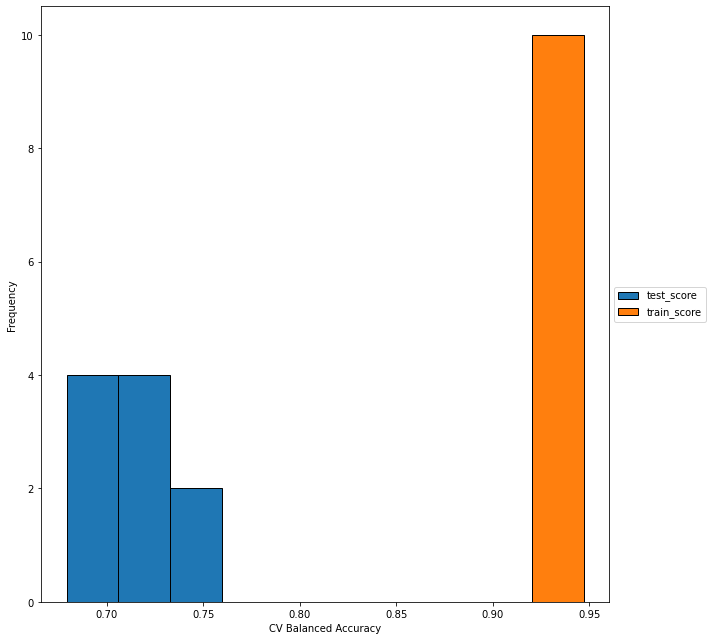

In [54]:
cv_results[['test_score', 'train_score']].plot.hist(edgecolor = 'black', figsize = (10,9))
plt.xlabel('CV Balanced Accuracy')
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig(figures_dir+'Figure6_190922.png' , dpi = 300)

In [60]:
from sklearn.model_selection import validation_curve
rf = RandomForestClassifier(max_samples = 0.66, random_state = 42)
n_estimators = [1,5, 10, 25, 50, 75, 100, 150]
train_scores, test_scores = validation_curve(
    rf, X_train1, y_train, param_name="n_estimators", param_range=n_estimators,
    cv=cv, scoring=scorer, n_jobs=2)


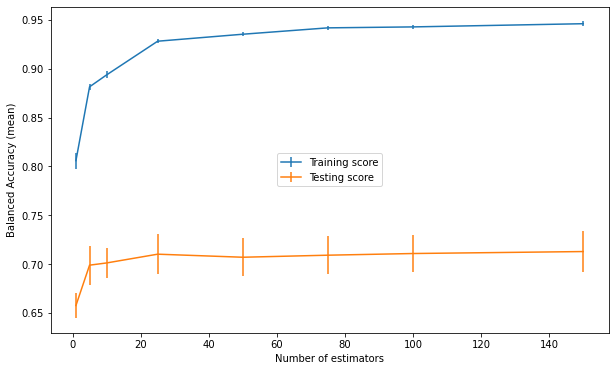

In [61]:
plt.figure(figsize = (10,6))
plt.errorbar(n_estimators, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label='Training score')
plt.errorbar(n_estimators, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label='Testing score')
plt.legend(loc = 'center')

plt.xlabel("Number of estimators")
plt.ylabel("Balanced Accuracy (mean)")
#_ = plt.title("Validation curve for RFC")
plt.savefig(figures_dir+'Figure7_190922.png', dpi = 300)

In [62]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

In [63]:
# Model imports
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_score, f1_score, recall_score, balanced_accuracy_score

In [64]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_BA_mean', 'cv_BA_std', 'cv_F1_mean', 'cv_F1_std','cv_MCC_mean','cv_MCC_std','cv_Recall_mean','cv_Recall_std',])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    scorer = {'BA' : make_scorer(balanced_accuracy_score) ,'F1': make_scorer(f1_score), 'MCC' : make_scorer(matthews_corrcoef), 'Recall' : make_scorer(recall_score)}
    cv = StratifiedKFold(n_splits = 10)
    cv_scores = cross_validate(model, train, train_labels, cv = cv, scoring=scorer, n_jobs = -1)
    cv_scores = pd.DataFrame(cv_scores)
    
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_BA_mean': cv_scores['test_BA'].mean(), 
                                                            'cv_BA_std': cv_scores['test_BA'].std(),
                                                          'cv_F1_mean': cv_scores['test_F1'].mean(), 
                                                            'cv_F1_std': cv_scores['test_F1'].std(),
                                                           'cv_MCC_mean': cv_scores['test_MCC'].mean(), 
                                                            'cv_MCC_std': cv_scores['test_MCC'].std(),
                                                           'cv_Recall_mean': cv_scores['test_Recall'].mean(), 
                                                            'cv_Recall_std': cv_scores['test_Recall'].std()
                                                          },
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [65]:
scorer = {'BA' : make_scorer(balanced_accuracy_score) ,'F1': make_scorer(f1_score), 'MCC' : make_scorer(matthews_corrcoef), 'Recall' : make_scorer(recall_score)}

cv_scores = cross_validate(LinearSVC(), X_train, y_train, cv = cv, scoring=scorer, n_jobs = -1)
cv_scores = pd.DataFrame()

In [66]:
model_results = cv_model(X_train1, y_train, LinearSVC(), 
                         'LSVC', model_results)

In [67]:
model_results = cv_model(X_train1, y_train, SVC(), 
                         'SVC', model_results)

In [68]:
model_results = cv_model(X_train1, y_train,  
                         GaussianNB(), 'GNB', model_results)

In [69]:
model_results = cv_model(X_train1, y_train,  
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)


In [70]:
model_results = cv_model(X_train1, y_train,
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)


In [71]:
model_results = cv_model(X_train1, y_train,
                         RidgeClassifierCV(), 'RIDGE', model_results)

In [72]:
for n in [5, 10, 20]:
    model_results = cv_model(X_train1, y_train, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)

In [73]:
model_results = cv_model(X_train1, y_train, 
                          RandomForestClassifier(100, random_state=10, max_samples = 0.66),
                              'RF', model_results)

In [74]:
round(model_results,3).to_csv(interim_dir+'meanCV_metrics_190922.csv')

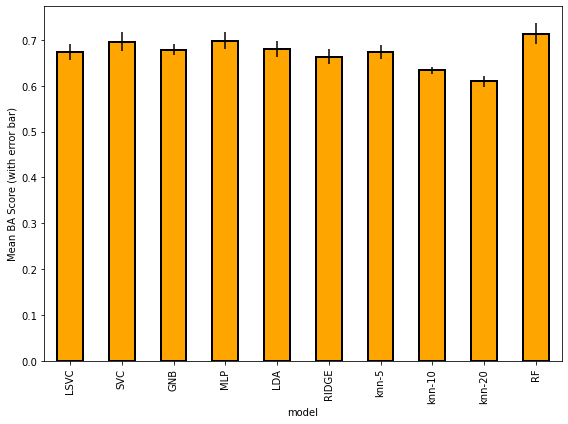

In [75]:
model_results.set_index('model', inplace = True)
model_results['cv_BA_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_BA_std']),
                                  edgecolor = 'k', linewidth = 2)
#plt.title('Model AUC Score Results');
plt.ylabel('Mean BA Score (with error bar)');
model_results.reset_index(inplace = True)
plt.tight_layout()
plt.savefig(figures_dir+'BA_results_190922.png', dpi = 300)

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200],
    "max_leaf_nodes": [2, 5, 10, 20, 50],
}

In [78]:
model_to_tune = RandomForestClassifier(random_state = 42, max_samples = 0.66)

In [79]:
inner_cv = StratifiedKFold(n_splits = 10)
outer_cv = StratifiedKFold(n_splits = 10)

In [80]:
model = GridSearchCV(
    estimator=model_to_tune, param_grid=param_grid, cv=inner_cv, scoring = make_scorer(balanced_accuracy_score), n_jobs=-1)

In [81]:
cv_results = cross_validate(model, X_train1, y_train, cv=outer_cv, scoring = make_scorer(balanced_accuracy_score), n_jobs=-1, return_estimator = True)

In [82]:
cv_results['test_score'].mean(), cv_results['test_score'].std()

(0.6453867508288798, 0.01472583057609264)

In [83]:
for estimator in cv_results["estimator"]:
    print(estimator.best_params_, estimator.best_score_)
    #print(f"# trees: {estimator.best_estimator_}")

{'max_leaf_nodes': 50, 'n_estimators': 50} 0.6431969057428939
{'max_leaf_nodes': 50, 'n_estimators': 200} 0.6420341099911504
{'max_leaf_nodes': 50, 'n_estimators': 100} 0.6370530140731906
{'max_leaf_nodes': 50, 'n_estimators': 20} 0.6339401025769494
{'max_leaf_nodes': 50, 'n_estimators': 5} 0.6356143833616397
{'max_leaf_nodes': 50, 'n_estimators': 100} 0.641084296827363
{'max_leaf_nodes': 50, 'n_estimators': 100} 0.6419232497154106
{'max_leaf_nodes': 50, 'n_estimators': 100} 0.6467075414305923
{'max_leaf_nodes': 50, 'n_estimators': 100} 0.6396018506205559
{'max_leaf_nodes': 50, 'n_estimators': 100} 0.6401740152937443


In [84]:
model.fit(X_train1, y_train).best_params_

{'max_leaf_nodes': 50, 'n_estimators': 50}

In [85]:
index_columns = [f"param_{name}" for name in param_grid.keys()]
columns = index_columns + ["mean_test_score"]

inner_cv_results = []
for cv_idx, estimator in enumerate(cv_results["estimator"]):
    search_cv_results = pd.DataFrame(estimator.cv_results_)
    search_cv_results = search_cv_results[columns].set_index(index_columns)
    search_cv_results = search_cv_results.rename(
        columns={"mean_test_score": f"CV {cv_idx}"})
    inner_cv_results.append(search_cv_results)
inner_cv_results = pd.concat(inner_cv_results, axis=1).T


In [86]:
inner_cv_results

param_n_estimators         1         2         5    10   20   50   100  200  \
param_max_leaf_nodes        2         2         2    2    2    2    2    2    
CV 0                  0.511126  0.505472  0.500000  0.5  0.5  0.5  0.5  0.5   
CV 1                  0.505928  0.503233  0.500316  0.5  0.5  0.5  0.5  0.5   
CV 2                  0.506368  0.504336  0.500000  0.5  0.5  0.5  0.5  0.5   
CV 3                  0.504131  0.502282  0.500318  0.5  0.5  0.5  0.5  0.5   
CV 4                  0.502316  0.501274  0.500318  0.5  0.5  0.5  0.5  0.5   
CV 5                  0.506711  0.506562  0.505649  0.5  0.5  0.5  0.5  0.5   
CV 6                  0.505426  0.502318  0.502278  0.5  0.5  0.5  0.5  0.5   
CV 7                  0.500000  0.500507  0.500247  0.5  0.5  0.5  0.5  0.5   
CV 8                  0.504503  0.502966  0.500316  0.5  0.5  0.5  0.5  0.5   
CV 9                  0.502564  0.503984  0.501830  0.5  0.5  0.5  0.5  0.5   

param_n_estimators         1         2    ...       100       200       1    \
param_max_leaf_nodes        5         5   ...        20        20        50   
CV 0                  0.584994  0.531969  ...  0.607244  0.613600  0.638788   
CV 1                  0.574817  0.532229  ...  0.605169  0.607238  0.621801   
CV 2                  0.571886  0.536865  ...  0.603526  0.603618  0.620079   
CV 3                  0.542544  0.528217  ...  0.607749  0.608160  0.616459   
CV 4                  0.549899  0.525209  ...  0.603104  0.603992  0.614485   
CV 5                  0.546300  0.532984  ...  0.603584  0.604205  0.619530   
CV 6                  0.544183  0.526907  ...  0.615551  0.617185  0.620501   
CV 7                  0.565225  0.524689  ...  0.614402  0.616176  0.637813   
CV 8                  0.542956  0.524052  ...  0.605582  0.603726  0.624114   
CV 9                  0.549084  0.528533  ...  0.608488  0.603962  0.636367   

param_n_estimators         2         5         10        20        50   \
param_max_leaf_nodes        50        50        50        50        50   
CV 0                  0.628794  0.630010  0.640183  0.640970  0.643197   
CV 1                  0.628372  0.634462  0.630278  0.637374  0.639358   
CV 2                  0.628596  0.634620  0.631637  0.632122  0.633327   
CV 3                  0.624489  0.625578  0.629573  0.633940  0.630197   
CV 4                  0.620682  0.635614  0.634183  0.630440  0.629810   
CV 5                  0.627655  0.627615  0.634657  0.634997  0.637096   
CV 6                  0.628770  0.630469  0.635739  0.638463  0.639422   
CV 7                  0.619462  0.627773  0.635123  0.642010  0.642433   
CV 8                  0.616435  0.632124  0.634017  0.633335  0.635654   
CV 9                  0.621863  0.626902  0.634107  0.636887  0.637806   

param_n_estimators         100       200  
param_max_leaf_nodes        50        50  
CV 0                  0.641693  0.642027  
CV 1                  0.641197  0.642034  
CV 2                  0.637053  0.636887  
CV 3                  0.632583  0.632677  
CV 4                  0.635606  0.634318  
CV 5                  0.641084  0.638287  
CV 6                  0.641923  0.641240  
CV 7                  0.646708  0.645580  
CV 8                  0.639602  0.637768  
CV 9                  0.640174  0.639076  

[10 rows x 40 columns]

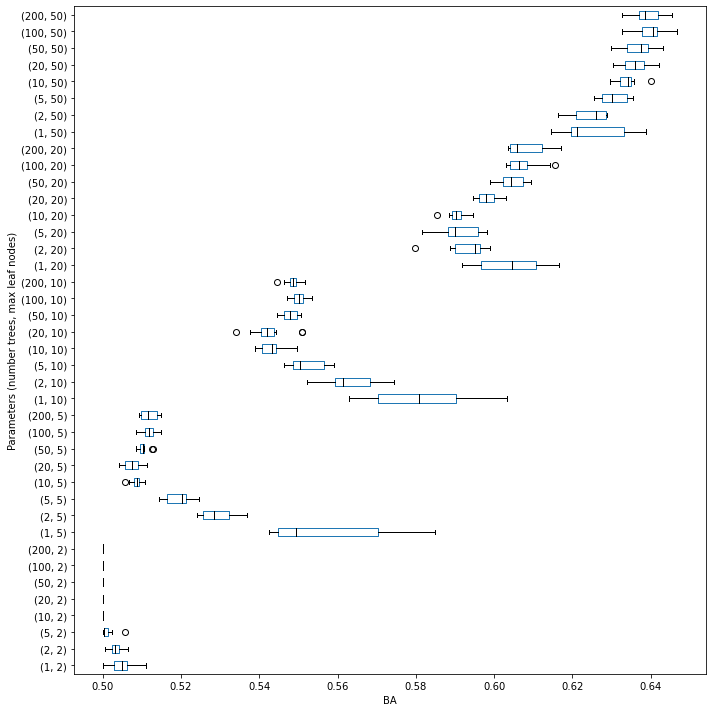

In [87]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
inner_cv_results.plot.box(vert=False, color=color, figsize = (10,10))
plt.xlabel("BA")
plt.ylabel("Parameters (number trees, max leaf nodes)")
#_ = plt.title("Inner CV results with parameters\n"
#              "(n_estimators, max_leaf_nodes)")
plt.tight_layout()
plt.savefig(figures_dir+'inner_CV_results_190922.png', dpi = 300)

In [88]:
final_model = RandomForestClassifier(random_state = 42, n_estimators = 50,max_leaf_nodes =50, max_samples = 0.66)

In [89]:
final_model.fit(X_train1, y_train)

RandomForestClassifier(max_leaf_nodes=50, max_samples=0.66, n_estimators=50,
                       random_state=42)

In [90]:
import pickle
filename = 'finalized_model_v2.sav'
pickle.dump(final_model, open(external_dir+filename, 'wb'))

In [91]:
len(final_model.feature_importances_)

271

In [92]:
features1 = list(X_train1.columns)

In [105]:
#features1

In [91]:
#X_train1

In [93]:
X_train1.to_csv(external_dir+'Xtrain1_190922.csv')

In [94]:
feature_importances1 = pd.DataFrame({'feature': features1, 'importance': final_model.feature_importances_})
feature_importances1.head()

feature  importance
0         atom:element_metal_group_I_II    0.001586
1          atom:element_metal_metalloid    0.000475
2  atom:element_metal_transistion_metal    0.000752
3              bond:C#N_nitrile_generic    0.000707
4                      bond:C#N_nitrile    0.000365

In [95]:
feature_importances1

feature  importance
0           atom:element_metal_group_I_II    0.001586
1            atom:element_metal_metalloid    0.000475
2    atom:element_metal_transistion_metal    0.000752
3                bond:C#N_nitrile_generic    0.000707
4                        bond:C#N_nitrile    0.000365
..                                    ...         ...
266           ring:hetero_[6_6]_Z_generic    0.006533
267         ring:hetero_[7]_generic_1_4-Z    0.000985
268           ring:hetero_[7]_generic_1-Z    0.000737
269     ring:hetero_[7]_N_azepine_generic    0.001083
270    ring:hetero_[7]_N_diazepine_(1_4-)    0.000310

[271 rows x 2 columns]

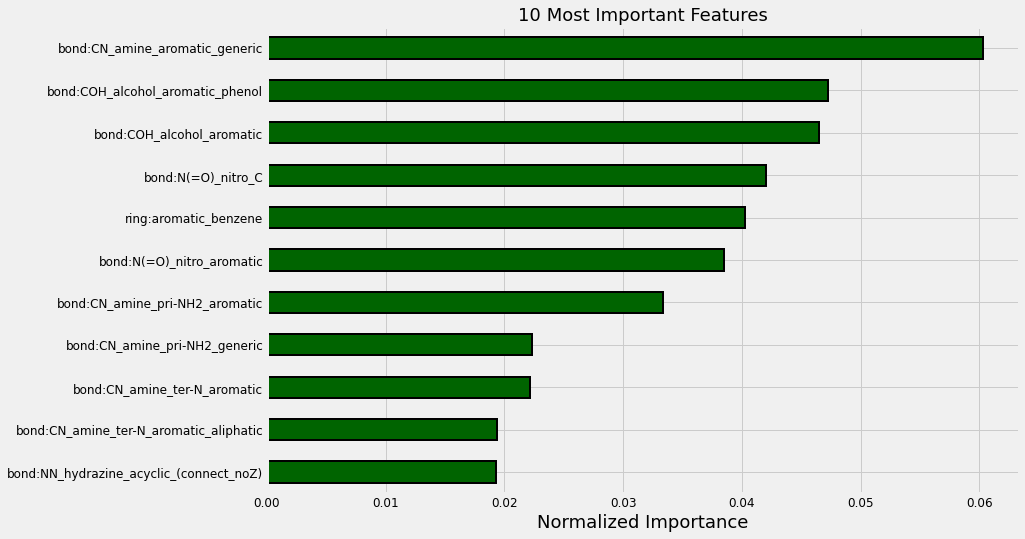

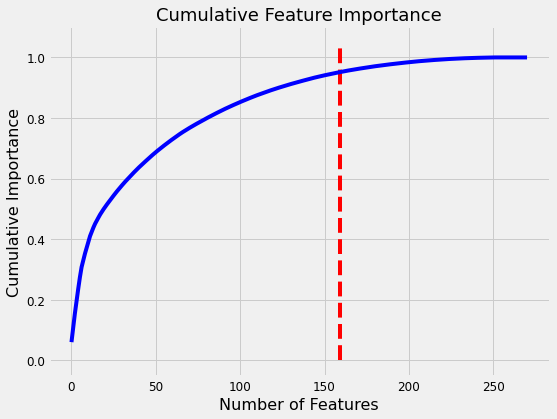

159 features required for 95% of cumulative importance.


In [96]:
norm_fi1 = plot_feature_importances(feature_importances1, threshold=0.95)

In [97]:
feats = norm_fi1[norm_fi1['cumulative_importance'] <0.95]['feature'].tolist()

In [98]:
enriched = pd.read_csv(interim_dir+'enriched_msti_p2_190822.csv')

In [99]:
enriched_txps = enriched['TxP'].tolist()


In [100]:
[e for e in enriched_txps if e in feats]

['ring:hetero_[4]_N_beta_lactam',
 'ring:hetero_[4]_N_azetidine',
 'ring:hetero_[4]_Z_generic',
 'bond:CC(=O)C_quinone_1_4-benzo',
 'bond:N=N_azo_aromatic',
 'bond:CC(=O)C_quinone_1_4-naphtho',
 'bond:NN_hydrazine_acyclic_(connect_noZ)',
 'bond:N=N_azo_generic',
 'ring:hetero_[5_6]_N_benzimidazole',
 'bond:C=N_imine_N(connect_noZ)',
 'bond:N(=O)_nitro_aromatic',
 'chain:alkeneLinear_diene_1_3-butene',
 'bond:COH_alcohol_alkene',
 'bond:CN_amine_ter-N_aromatic',
 'bond:CN_amine_ter-N_aromatic_aliphatic',
 'bond:N(=O)_nitro_C',
 'bond:COH_alcohol_alkene_cyclic',
 'ring:hetero_[5_6]_N_indole',
 'bond:CN_amine_aromatic_generic',
 'bond:C=S_carbonyl_thio_generic',
 'bond:C=O_acyl_hydrazide',
 'bond:CN_amine_pri-NH2_aromatic',
 'bond:S(=O)O_sulfonicAcid_cyclic_(ring)',
 'bond:C(=O)O_carboxylicAcid_alkenyl',
 'bond:NN_hydrazine_alkyl_N(connect_Z=1)',
 'ring:hetero_[5]_N_pyrrole',
 'chain:alkeneCyclic_diene_cyclopentadiene',
 'ring:hetero_[5]_O_furan']

In [101]:
len([e for e in enriched_txps if e in feats])

28

In [179]:
from sklearn.tree import export_graphviz


In [182]:
final_model.estimators_[0]

DecisionTreeClassifier(max_features='auto', max_leaf_nodes=50,
                       random_state=1608637542)

In [198]:
export_graphviz(final_model.estimators_[1], 
                out_file= 'tree1.dot', 
                feature_names = features1,
                class_names = True, max_depth = 5,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree1.png')

In [193]:
pwd

'/home/grace/Documents/python/msti/notebooks'

In [199]:
cols_to_keep = X_train1.columns.tolist()

In [200]:
len(cols_to_keep)

271

In [201]:
open_file = open(external_dir+'cols_to_keep_190922.pkl', "wb")
pickle.dump(cols_to_keep, open_file)

In [202]:
X_test = X_test[cols_to_keep]

In [203]:
X_test.shape

(1507, 271)

In [204]:
preds = final_model.predict(X_test)

In [205]:
balanced_accuracy_score(y_test, preds)

0.6479544044996686

In [206]:
roc_auc_score(y_test, preds)

0.6479544044996685

In [207]:
matthews_corrcoef(y_test, preds)

0.38694280261065694

In [208]:
from sklearn.metrics import confusion_matrix, classification_report

In [209]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
tn, fp, fn, tp

(1012, 58, 284, 153)

In [210]:
confusion_matrix(y_test, preds)

array([[1012,   58],
       [ 284,  153]])

In [211]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1070
           1       0.73      0.35      0.47       437

    accuracy                           0.77      1507
   macro avg       0.75      0.65      0.66      1507
weighted avg       0.76      0.77      0.74      1507



In [212]:
tp/(tp+fn)

0.3501144164759725

In [213]:
tp/(tp+fp)

0.7251184834123223

In [214]:
tn/(tn+fp)

0.9457943925233645

In [215]:
X_test

atom:element_metal_group_I_II  atom:element_metal_metalloid  \
DTXSID2020921                              0                             0   
DTXSID1025271                              0                             0   
DTXSID0049284                              0                             0   
DTXSID2041545                              0                             0   
DTXSID1032511                              0                             0   
...                                      ...                           ...   
DTXSID7021659                              0                             0   
DTXSID4046151                              0                             0   
DTXSID4027490                              0                             1   
DTXSID6025355                              0                             0   
DTXSID4041361                              0                             0   

               atom:element_metal_transistion_metal  bond:C#N_nitrile_generic  \
DTXSID2020921                                     0                         0   
DTXSID1025271                                     0                         0   
DTXSID0049284                                     0                         0   
DTXSID2041545                                     0                         0   
DTXSID1032511                                     0                         0   
...                                             ...                       ...   
DTXSID7021659                                     0                         0   
DTXSID4046151                                     0                         0   
DTXSID4027490                                     0                         0   
DTXSID6025355                                     0                         0   
DTXSID4041361                                     0                         0   

               bond:C#N_nitrile  bond:C(~Z)~C~Q_a-haloalcohol  \
DTXSID2020921                 0                             0   
DTXSID1025271                 0                             0   
DTXSID0049284                 0                             0   
DTXSID2041545                 0                             0   
DTXSID1032511                 0                             0   
...                         ...                           ...   
DTXSID7021659                 0                             0   
DTXSID4046151                 0                             0   
DTXSID4027490                 0                             0   
DTXSID6025355                 0                             0   
DTXSID4041361                 0                             0   

               bond:C(~Z)~C~Q_a-halocarbonyl  bond:C(=O)N_carbamate  \
DTXSID2020921                              0                      0   
DTXSID1025271                              0                      0   
DTXSID0049284                              0                      0   
DTXSID2041545                              0                      1   
DTXSID1032511                              0                      0   
...                                      ...                    ...   
DTXSID7021659                              0                      0   
DTXSID4046151                              0                      0   
DTXSID4027490                              0                      0   
DTXSID6025355                              0                      0   
DTXSID4041361                              0                      0   

               bond:C(=O)N_carboxamide_(NH2)  bond:C(=O)N_carboxamide_(NHR)  \
DTXSID2020921                              0                              0   
DTXSID1025271                              0                              0   
DTXSID0049284                              0                              0   
DTXSID2041545                              0                              0   
DTXSID1032511                              0                              0 

#### Applicability domain - global approach on the based of the leverage score

In [216]:
Ht = X_test.dot(np.linalg.inv(X_train1.T.dot(X_train1)).dot(X_test.T))

In [217]:
hat_diag = np.diagonal(Ht)

In [218]:
p = X_train1.shape[1]
n = X_train1.shape[0]

In [219]:
threshold = 3*(p/n)

In [220]:
mylst = []
for i in range(len(hat_diag)):
    if hat_diag[i]> threshold:
        mylst.append(1)
    else:
        mylst.append(0)


In [221]:
len(mylst)

1507

In [222]:
X_test['domain'] = mylst

<ipython-input-222-9a1460e21544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['domain'] = mylst


In [223]:
X_test['domain'].value_counts()

0    1444
1      63
Name: domain, dtype: int64

In [224]:
X_test['domain'].value_counts(normalize = True)

0    0.958195
1    0.041805
Name: domain, dtype: float64

In [225]:
X_test.iloc[np.where(X_test['domain'] ==1)].index

Index(['DTXSID4046600', 'DTXSID5024263', 'DTXSID0045597', 'DTXSID1048704',
       'DTXSID1048207', 'DTXSID5047328', 'DTXSID0023745', 'DTXSID9022601',
       'DTXSID8024286', 'DTXSID5023081', 'DTXSID8040484', 'DTXSID3037709',
       'DTXSID6021660', 'DTXSID3029572', 'DTXSID8034956', 'DTXSID4021397',
       'DTXSID2046678', 'DTXSID9047839', 'DTXSID5023039', 'DTXSID6045953',
       'DTXSID7049219', 'DTXSID1021952', 'DTXSID1047784', 'DTXSID0057702',
       'DTXSID8027747', 'DTXSID4032532', 'DTXSID9036933', 'DTXSID2023488',
       'DTXSID5041273', 'DTXSID7047304', 'DTXSID7044558', 'DTXSID0046511',
       'DTXSID7046675', 'DTXSID1021667', 'DTXSID2020688', 'DTXSID8047347',
       'DTXSID0035748', 'DTXSID1045530', 'DTXSID2020266', 'DTXSID8021721',
       'DTXSID0033334', 'DTXSID0041987', 'DTXSID5020815', 'DTXSID9048516',
       'DTXSID3041085', 'DTXSID7020425', 'DTXSID4020668', 'DTXSID6020357',
       'DTXSID6048961', 'DTXSID7021992', 'DTXSID9023546', 'DTXSID6021668',
       'DTXSID3024942', '

In [226]:
df[df.index.isin(X_test.iloc[np.where(X_test['domain'] ==1)].index)].to_csv(processed_dir+'Out_of_AD_testset_190922.csv')

### Local appliability domain

In [227]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import pairwise_distances

In [228]:
def test_train_distance_matrix(test, train, metric = 'jaccard'):
    '''
    create the pairwise distance matrix of test and training set chemicals but split to 
    return test chemical pairwise distances with the training set chemicals only
    test and train are both df of chemical features
    '''
    concat_df = pd.concat([test, train],axis = 0)
    concat_dist = pd.DataFrame(pairwise_distances(concat_df.values, metric=metric), columns = concat_df.index, index = concat_df.index)
    df = pd.DataFrame(concat_dist.values[:len(test), len(test):], columns = train.index, index = test.index)
    
    return df

In [229]:
def train_distance_matrix(Xtrain, metric = 'jaccard'):
    df = pd.DataFrame(pairwise_distances(Xtrain.values, metric=metric), columns = Xtrain.index, index = Xtrain.index)
    return df

In [230]:
def nn_neighbours(chem, df, n=10):
    '''
    chem is the test chemical of interest
    df is the dataframe of test chemicals and their pairwise similarity with the training set substances
    '''
    chem_nn = df.loc[chem, :].values
    out_arr = np.argsort(chem_nn)[:n]
    dists = chem_nn[out_arr]
    ids = {i:x for i, x in enumerate(df.columns)}
    nns = [ids[e] for e in out_arr]
    df = pd.DataFrame(zip(nns, dists), columns = ['dtxsid', 'dist'])
    df['target'] = chem
    
    return df

In [231]:
X_train_dist  = train_distance_matrix(X_train1, metric = 'jaccard')

In [232]:
#nn_neighbours('DTXSID9024485',X_train_dist, n = 5 )

In [233]:
mydist = []
for dtx in X_train_dist.index:
    a = nn_neighbours(dtx,X_train_dist, n = 6 )
    mydist.append(a)
    

In [234]:
mydist[0]

dtxsid      dist         target
0  DTXSID7023691  0.000000  DTXSID7023691
1  DTXSID6023737  0.375000  DTXSID7023691
2  DTXSID8045802  0.500000  DTXSID7023691
3  DTXSID8045145  0.529412  DTXSID7023691
4  DTXSID7047807  0.550000  DTXSID7023691
5  DTXSID4045927  0.555556  DTXSID7023691

In [235]:
all_dist = pd.concat(mydist)

In [236]:
all_dist = all_dist[~(all_dist['dtxsid'] == all_dist['target'])]

In [237]:
dists = []
for i, group in all_dist.groupby('target'):
    dists.append(group['dist'].mean())

In [238]:
len(dists)

6025

In [239]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

In [240]:
x1, y1 = ecdf(dists)

In [241]:
def ecdf_plot(x,y, title=None):
    plt.figure(figsize = (10,9))
    plt.plot(x, y , marker = '.', linestyle = 'none', label = title)
    plt.xlabel('Distance')
    plt.ylabel('ECDF')
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from '/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/matplotlib/pyplot.py'>

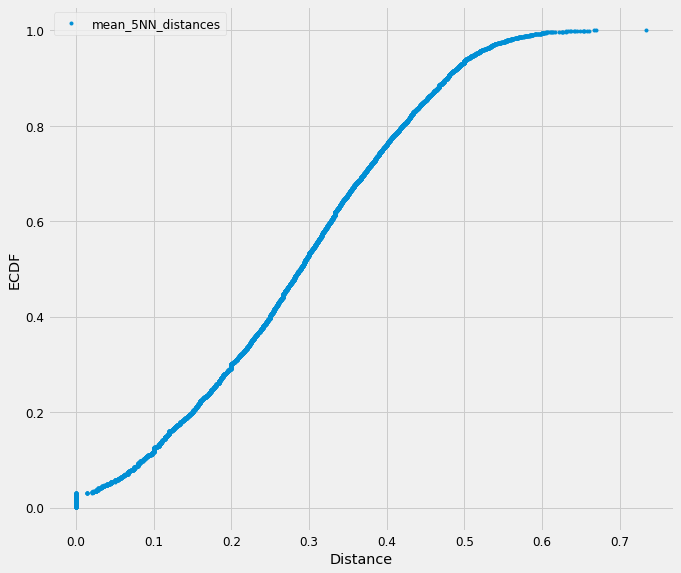

In [242]:
ecdf_plot(x1,y1, title = 'mean_5NN_distances')

In [243]:
print('The AD threshold is {}'.format(np.percentile(x1, 95)))

The AD threshold is 0.5141447415329768


In [244]:
AD = np.percentile(x1, 95)

In [245]:
AD

0.5141447415329768

In [246]:
X_test_train_dist = test_train_distance_matrix(X_test, X_train1, metric = 'jaccard')

In [247]:
Xtestdist = []
for dtx in X_test_train_dist.index:
    a = nn_neighbours(dtx,X_test_train_dist, n = 5 )
    Xtestdist.append(a)

In [248]:
Xtestdist[0]

dtxsid      dist         target
0  DTXSID3020916  0.166667  DTXSID2020921
1  DTXSID2024458  0.166667  DTXSID2020921
2  DTXSID7020920  0.166667  DTXSID2020921
3  DTXSID3025881  0.333333  DTXSID2020921
4  DTXSID4021137  0.333333  DTXSID2020921

In [249]:
Xtest_dist_df = pd.concat(Xtestdist)

In [250]:
ad_test = {}
for i, group in Xtest_dist_df.groupby('target'):
    k = [e for e in group['target']][0]
    v = group['dist'].mean()
    ad_test[k] = v

In [251]:
AD_dict = {}
for k, v in ad_test.items():
    if v <= AD:
        AD_dict[k] = 0
    else:
        AD_dict[k] = 1

In [252]:
ad_array = np.array(list(AD_dict.values()))
unique, counts = np.unique(ad_array, return_counts = True)

In [253]:
unique, counts

(array([0, 1]), array([1369,  138]))

In [254]:
len(ad_array)

1507

In [255]:
138/1507

0.0915726609157266

In [256]:
AD_df = pd.DataFrame(list(AD_dict.items()), columns = ['dtxsid', 'local_AD'])

In [276]:
AD_df[AD_df['local_AD'] ==1].to_csv(interim_dir+'Out_of_localAD_testset_190922.csv')

In [258]:
df.loc[AD_df[AD_df['local_AD'] ==1]['dtxsid'], :].iloc[:,729:]['hitc'].value_counts(normalize = True)

0    0.65942
1    0.34058
Name: hitc, dtype: float64

In [259]:
df.loc[AD_df[AD_df['local_AD'] ==1]['dtxsid'], :].iloc[:,729:]

hitc                                        chnm         casn
DTXSID0020363     0                        Cyclopentanone oxime    1192-28-5
DTXSID0020527     0                         Dinitrosopiperazine     140-79-4
DTXSID0021256     1                               Sulfasalazine     599-79-1
DTXSID0021331     1  Tetrakis(hydroxymethyl)phosphonium sulfate   55566-30-8
DTXSID0024052     0                                  Dimethipin   55290-64-7
...             ...                                         ...          ...
DTXSID9046443     0                    Duloxetine hydrochloride  136434-34-9
DTXSID9047706     0             2-Methyl-4-propyl-1,3-oxathiane   67715-80-4
DTXSID9047835     0                        Caramiphen edisylate     125-86-0
DTXSID9048512     1                                  Ro 23-7637  107071-66-9
DTXSID9051662     1  1,2-Dihydro-1-methyl-5H-tetrazole-5-thione   13183-79-4

[138 rows x 3 columns]

In [260]:
df[df.index.isin(X_test.iloc[np.where(X_test['domain'] ==1)].index)].iloc[:,729:]

hitc                                          chnm         casn
DTXSID4020668     0                                Glycol sulfite    3741-38-6
DTXSID6020357     0                                 Cyclocytidine   31698-14-3
DTXSID9022601     1                                Amphotericin B    1397-89-3
DTXSID8022822     1                                     Cinoxacin   28657-80-9
DTXSID7047304     1                                     CP-100829  135080-03-4
...             ...                                           ...          ...
DTXSID9026261     0         Tris(1,3-dichloro-2-propyl) phosphate   13674-87-8
DTXSID7049219     0  1-Ethyl-3-methylimidazolium methanesulfonate  145022-45-3
DTXSID4026216     0   Phosphoric acid, tris(3-methylphenyl) ester     563-04-2
DTXSID3041085     1                                     Ofloxacin   82419-36-1
DTXSID3044201     1                           Quetiapine fumarate  111974-72-2

[63 rows x 3 columns]

In [261]:
df[df.index.isin(X_test.iloc[np.where(X_test['domain'] ==1)].index)].iloc[:,729:]

hitc                                          chnm         casn
DTXSID4020668     0                                Glycol sulfite    3741-38-6
DTXSID6020357     0                                 Cyclocytidine   31698-14-3
DTXSID9022601     1                                Amphotericin B    1397-89-3
DTXSID8022822     1                                     Cinoxacin   28657-80-9
DTXSID7047304     1                                     CP-100829  135080-03-4
...             ...                                           ...          ...
DTXSID9026261     0         Tris(1,3-dichloro-2-propyl) phosphate   13674-87-8
DTXSID7049219     0  1-Ethyl-3-methylimidazolium methanesulfonate  145022-45-3
DTXSID4026216     0   Phosphoric acid, tris(3-methylphenyl) ester     563-04-2
DTXSID3041085     1                                     Ofloxacin   82419-36-1
DTXSID3044201     1                           Quetiapine fumarate  111974-72-2

[63 rows x 3 columns]

In [262]:
len(set(df.loc[AD_df[AD_df['local_AD'] ==1]['dtxsid'], :].iloc[:,729:].index).intersection(set(df[df.index.isin(X_test.iloc[np.where(X_test['domain'] ==1)].index)].iloc[:,729:].index)))

6

In [263]:
len(set(df.loc[AD_df[AD_df['local_AD'] ==1]['dtxsid'], :].iloc[:,729:].index).intersection(set(df[df.index.isin(X_test.iloc[np.where(X_test['domain'] ==1)].index)].iloc[:,729:].index)))

6

In [264]:
preds

array([1, 0, 0, ..., 0, 0, 1])

In [265]:
X_test['predictions'] = preds

In [266]:
X_test

atom:element_metal_group_I_II  atom:element_metal_metalloid  \
DTXSID2020921                              0                             0   
DTXSID1025271                              0                             0   
DTXSID0049284                              0                             0   
DTXSID2041545                              0                             0   
DTXSID1032511                              0                             0   
...                                      ...                           ...   
DTXSID7021659                              0                             0   
DTXSID4046151                              0                             0   
DTXSID4027490                              0                             1   
DTXSID6025355                              0                             0   
DTXSID4041361                              0                             0   

               atom:element_metal_transistion_metal  bond:C#N_nitrile_generic  \
DTXSID2020921                                     0                         0   
DTXSID1025271                                     0                         0   
DTXSID0049284                                     0                         0   
DTXSID2041545                                     0                         0   
DTXSID1032511                                     0                         0   
...                                             ...                       ...   
DTXSID7021659                                     0                         0   
DTXSID4046151                                     0                         0   
DTXSID4027490                                     0                         0   
DTXSID6025355                                     0                         0   
DTXSID4041361                                     0                         0   

               bond:C#N_nitrile  bond:C(~Z)~C~Q_a-haloalcohol  \
DTXSID2020921                 0                             0   
DTXSID1025271                 0                             0   
DTXSID0049284                 0                             0   
DTXSID2041545                 0                             0   
DTXSID1032511                 0                             0   
...                         ...                           ...   
DTXSID7021659                 0                             0   
DTXSID4046151                 0                             0   
DTXSID4027490                 0                             0   
DTXSID6025355                 0                             0   
DTXSID4041361                 0                             0   

               bond:C(~Z)~C~Q_a-halocarbonyl  bond:C(=O)N_carbamate  \
DTXSID2020921                              0                      0   
DTXSID1025271                              0                      0   
DTXSID0049284                              0                      0   
DTXSID2041545                              0                      1   
DTXSID1032511                              0                      0   
...                                      ...                    ...   
DTXSID7021659                              0                      0   
DTXSID4046151                              0                      0   
DTXSID4027490                              0                      0   
DTXSID6025355                              0                      0   
DTXSID4041361                              0                      0   

               bond:C(=O)N_carboxamide_(NH2)  bond:C(=O)N_carboxamide_(NHR)  \
DTXSID2020921                              0                              0   
DTXSID1025271                              0                              0   
DTXSID0049284                              0                              0   
DTXSID2041545                              0                              0   
DTXSID1032511                              0                              0 

Out of domain leverage and hits vs predictions

In [267]:
leverage_preds = pd.concat([df.loc[X_test.index,:].iloc[:,729:], X_test.iloc[:, 269:]], axis = 1)

In [268]:
leverage_preds

hitc                                  chnm        casn  \
DTXSID2020921     1                       2-Naphthylamine     91-59-8   
DTXSID1025271     1                        N-Ethylaniline    103-69-5   
DTXSID0049284     0      3,5,5-Trimethylhexanoyl chloride  36727-29-4   
DTXSID2041545     1  6-Chloro-2,3-dihydrobenzoxazol-2-one  19932-84-4   
DTXSID1032511     0    1,3,5-Triethylhexahydro-s-triazine   7779-27-3   
...             ...                                   ...         ...   
DTXSID7021659     0                     Propanedioic acid    141-82-2   
DTXSID4046151     0                             Lonazolac  53808-88-1   
DTXSID4027490     0      (3-Chloropropyl)trimethoxysilane   2530-87-2   
DTXSID6025355     1                        Glutaraldehyde    111-30-8   
DTXSID4041361     1           2,4-Dichloro-6-nitroaniline   2683-43-4   

               ring:hetero_[7]_N_azepine_generic  \
DTXSID2020921                                  0   
DTXSID1025271                                  0   
DTXSID0049284                                  0   
DTXSID2041545                                  0   
DTXSID1032511                                  0   
...                                          ...   
DTXSID7021659                                  0   
DTXSID4046151                                  0   
DTXSID4027490                                  0   
DTXSID6025355                                  0   
DTXSID4041361                                  0   

               ring:hetero_[7]_N_diazepine_(1_4-)  domain  predictions  
DTXSID2020921                                   0       0            1  
DTXSID1025271                                   0       0            0  
DTXSID0049284                                   0       0            0  
DTXSID2041545                                   0       0            0  
DTXSID1032511                                   0       0            0  
...                                           ...     ...          ...  
DTXSID7021659                                   0       0            0  
DTXSID4046151                                   0       0            0  
DTXSID4027490                                   0       0            0  
DTXSID6025355                                   0       0            0  
DTXSID4041361                                   0       0            1  

[1507 rows x 7 columns]

In [269]:
incorrect = []
for i, row in leverage_preds.iterrows():
    if row['hitc'] == row['predictions']:
        incorrect.append(0)
    else:
        incorrect.append(1)
leverage_preds['mismatch'] = incorrect

leverage_preds

hitc                                  chnm        casn  \
DTXSID2020921     1                       2-Naphthylamine     91-59-8   
DTXSID1025271     1                        N-Ethylaniline    103-69-5   
DTXSID0049284     0      3,5,5-Trimethylhexanoyl chloride  36727-29-4   
DTXSID2041545     1  6-Chloro-2,3-dihydrobenzoxazol-2-one  19932-84-4   
DTXSID1032511     0    1,3,5-Triethylhexahydro-s-triazine   7779-27-3   
...             ...                                   ...         ...   
DTXSID7021659     0                     Propanedioic acid    141-82-2   
DTXSID4046151     0                             Lonazolac  53808-88-1   
DTXSID4027490     0      (3-Chloropropyl)trimethoxysilane   2530-87-2   
DTXSID6025355     1                        Glutaraldehyde    111-30-8   
DTXSID4041361     1           2,4-Dichloro-6-nitroaniline   2683-43-4   

               ring:hetero_[7]_N_azepine_generic  \
DTXSID2020921                                  0   
DTXSID1025271                                  0   
DTXSID0049284                                  0   
DTXSID2041545                                  0   
DTXSID1032511                                  0   
...                                          ...   
DTXSID7021659                                  0   
DTXSID4046151                                  0   
DTXSID4027490                                  0   
DTXSID6025355                                  0   
DTXSID4041361                                  0   

               ring:hetero_[7]_N_diazepine_(1_4-)  domain  predictions  \
DTXSID2020921                                   0       0            1   
DTXSID1025271                                   0       0            0   
DTXSID0049284                                   0       0            0   
DTXSID2041545                                   0       0            0   
DTXSID1032511                                   0       0            0   
...                                           ...     ...          ...   
DTXSID7021659                                   0       0            0   
DTXSID4046151                                   0       0            0   
DTXSID4027490                                   0       0            0   
DTXSID6025355                                   0       0            0   
DTXSID4041361                                   0       0            1   

               mismatch  
DTXSID2020921         0  
DTXSID1025271         1  
DTXSID0049284         0  
DTXSID2041545         1  
DTXSID1032511         0  
...                 ...  
DTXSID7021659         0  
DTXSID4046151         0  
DTXSID4027490         0  
DTXSID6025355         1  
DTXSID4041361         0  

[1507 rows x 8 columns]

<AxesSubplot:ylabel='Frequency'>

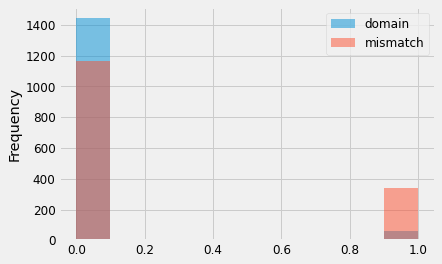

In [270]:
leverage_preds[['domain', 'mismatch']].plot( alpha = 0.5, kind = 'hist')

In [271]:
nn_AD = pd.merge(df.loc[AD_df[AD_df['local_AD'] ==1]['dtxsid'], :].iloc[:,729:], X_test.iloc[:, 269:], left_on = df.loc[AD_df[AD_df['local_AD'] ==1]['dtxsid'], :].iloc[:,729:].index, right_on = X_test.index, how = 'left')

In [272]:
nn_AD

key_0  hitc                                        chnm  \
0    DTXSID0020363     0                        Cyclopentanone oxime   
1    DTXSID0020527     0                         Dinitrosopiperazine   
2    DTXSID0021256     1                               Sulfasalazine   
3    DTXSID0021331     1  Tetrakis(hydroxymethyl)phosphonium sulfate   
4    DTXSID0024052     0                                  Dimethipin   
..             ...   ...                                         ...   
133  DTXSID9046443     0                    Duloxetine hydrochloride   
134  DTXSID9047706     0             2-Methyl-4-propyl-1,3-oxathiane   
135  DTXSID9047835     0                        Caramiphen edisylate   
136  DTXSID9048512     1                                  Ro 23-7637   
137  DTXSID9051662     1  1,2-Dihydro-1-methyl-5H-tetrazole-5-thione   

            casn  ring:hetero_[7]_N_azepine_generic  \
0      1192-28-5                                  0   
1       140-79-4                                  0   
2       599-79-1                                  0   
3     55566-30-8                                  0   
4     55290-64-7                                  0   
..           ...                                ...   
133  136434-34-9                                  0   
134   67715-80-4                                  0   
135     125-86-0                                  0   
136  107071-66-9                                  0   
137   13183-79-4                                  0   

     ring:hetero_[7]_N_diazepine_(1_4-)  domain  predictions  
0                                     0       0            0  
1                                     0       0            0  
2                                     0       0            1  
3                                     0       0            0  
4                                     0       0            0  
..                                  ...     ...          ...  
133                                   0       0            0  
134                                   0       0            0  
135                                   0       0            0  
136                                   0       0            0  
137                                   0       0            0  

[138 rows x 8 columns]

In [273]:
incorr = []
for i, row in nn_AD.iterrows():
    if row['hitc'] == row['predictions']:
        incorr.append(0)
    else:
        incorr.append(1)
nn_AD['mismatch'] = incorr

nn_AD

key_0  hitc                                        chnm  \
0    DTXSID0020363     0                        Cyclopentanone oxime   
1    DTXSID0020527     0                         Dinitrosopiperazine   
2    DTXSID0021256     1                               Sulfasalazine   
3    DTXSID0021331     1  Tetrakis(hydroxymethyl)phosphonium sulfate   
4    DTXSID0024052     0                                  Dimethipin   
..             ...   ...                                         ...   
133  DTXSID9046443     0                    Duloxetine hydrochloride   
134  DTXSID9047706     0             2-Methyl-4-propyl-1,3-oxathiane   
135  DTXSID9047835     0                        Caramiphen edisylate   
136  DTXSID9048512     1                                  Ro 23-7637   
137  DTXSID9051662     1  1,2-Dihydro-1-methyl-5H-tetrazole-5-thione   

            casn  ring:hetero_[7]_N_azepine_generic  \
0      1192-28-5                                  0   
1       140-79-4                                  0   
2       599-79-1                                  0   
3     55566-30-8                                  0   
4     55290-64-7                                  0   
..           ...                                ...   
133  136434-34-9                                  0   
134   67715-80-4                                  0   
135     125-86-0                                  0   
136  107071-66-9                                  0   
137   13183-79-4                                  0   

     ring:hetero_[7]_N_diazepine_(1_4-)  domain  predictions  mismatch  
0                                     0       0            0         0  
1                                     0       0            0         0  
2                                     0       0            1         0  
3                                     0       0            0         1  
4                                     0       0            0         0  
..                                  ...     ...          ...       ...  
133                                   0       0            0         0  
134                                   0       0            0         0  
135                                   0       0            0         0  
136                                   0       0            0         1  
137                                   0       0            0         1  

[138 rows x 9 columns]

<AxesSubplot:ylabel='Frequency'>

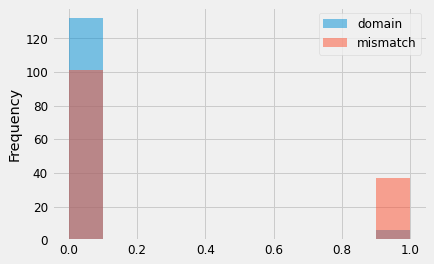

In [274]:
nn_AD[['domain', 'mismatch']].plot( alpha = 0.5, kind = 'hist')